In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import joblib

In [2]:
def load_data():
  condo_df = pd.read_csv('../dataset/cleaned/bangkok-condo-dataset.csv')
  return condo_df

In [3]:
condo_df = load_data()

In [4]:
condo_df.shape

(1429, 20)

In [5]:
condo_df = load_data()
condo_df.tail(5)

,ID,Condo_NAME_EN,Condo_NAME_TH,Condo_area,Condo_link,Address_TH,Year_built,Area_m2,#_Tower,#_Floor,Sale_Price_Sqm,Sale_Price_Increment[Quarter],Sale_Price_Inc[Year],Rental_Yield,Rental_Yield_Inc[Year],Latitude,Longtitude,All_Data,MinDist_Station,Condo_Area_corr
1424,1436,S.V. City Rama 3,เอส วี ซิตี้ พระราม 3,Yan Nawa,https://www.hipflat.co.th/projects/sv-city-ram...,900/1-36 พระรามที่ 3 แขวง บางโพงพาง เขต ยานนาวา,1995,NaN,7,36.0,69821,35.47,43.57,4.47,30.65,13.673454,100.542902,True,5573,"Yan Nawa, Bangkok"
1425,1437,LPN Tower,แอล พี เอ็น ทาวเวอร์,Yan Nawa,https://www.hipflat.co.th/projects/lpn-tower-a...,ซอย สามย่านซีฟู้ด แขวง ช่องนนทรี เขต ยานนาวา,1992,"13,592",1,18.0,88805,0.00,-56.58,4.18,-59.82,13.704100,100.542168,True,2403,"Yan Nawa, Bangkok"
1426,1438,Modern Home Tower The Exclusive,โมเดอร์น โฮม ทาวเวอร์ ดิ เอ็กซคลูซีฟ,Yan Nawa,https://www.hipflat.co.th/projects/modern-home...,149 ซอย นนทรี 3 แขวง ช่องนนทรี เขต ยานนาวา,1997,"22,451",1,32.0,70897,-3.65,31.70,6.19,71.03,13.697223,100.539625,True,3136,"Yan Nawa, Bangkok"
1427,1439,Pratunam Prestige,ประตูน้ำ เพรสตีจ,Ratchathewi,https://www.hipflat.co.th/projects/pratunam-pr...,651 ถนน เพชรบุรี แขวง ถนนพญาไท เขต ราชเทวี,1994,NaN,1,NaN,78880,0.00,-14.29,4.84,7.43,13.751542,100.536824,True,568,"Ratchathewi, Bangkok"
1428,1440,Indra Condominium,อินทรา คอนโดมิเนียม,Ratchathewi,https://www.hipflat.co.th/projects/indra-condo...,ซอย แขวง ถนนพญาไท เขต ราชเทวี,1984,"13,921",1,NaN,61437,0.00,0.00,5.20,-21.99,13.753962,100.538626,True,614,"Ratchathewi, Bangkok"


In [6]:
condo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1429 non-null   int64  
 1   Condo_NAME_EN                  1429 non-null   object 
 2   Condo_NAME_TH                  1429 non-null   object 
 3   Condo_area                     1429 non-null   object 
 4   Condo_link                     1429 non-null   object 
 5   Address_TH                     1429 non-null   object 
 6   Year_built                     1429 non-null   int64  
 7   Area_m2                        1028 non-null   object 
 8   #_Tower                        1429 non-null   int64  
 9   #_Floor                        1427 non-null   float64
 10  Sale_Price_Sqm                 1429 non-null   int64  
 11  Sale_Price_Increment[Quarter]  1429 non-null   float64
 12  Sale_Price_Inc[Year]           1410 non-null   f

In [7]:
condo_df['Condo_Area_corr']

0         Bang Kapi, Bangkok
1         Bang Kapi, Bangkok
2         Bang Kapi, Bangkok
3         Bang Kapi, Bangkok
4         Bang Kapi, Bangkok
                ...         
1424       Yan Nawa, Bangkok
1425       Yan Nawa, Bangkok
1426       Yan Nawa, Bangkok
1427    Ratchathewi, Bangkok
1428    Ratchathewi, Bangkok
Name: Condo_Area_corr, Length: 1429, dtype: object

In [8]:
# Drop unsed columns

cols = ['ID', 'Condo_NAME_EN', 'Condo_NAME_TH', 'Condo_link', 'All_Data', 'Condo_Area_corr']
condo_df = condo_df.drop(cols, axis=1)

In [9]:
# Check missing value
(condo_df == '').sum()

Condo_area                       0
Address_TH                       0
Year_built                       0
Area_m2                          0
#_Tower                          0
#_Floor                          0
Sale_Price_Sqm                   0
Sale_Price_Increment[Quarter]    0
Sale_Price_Inc[Year]             0
Rental_Yield                     0
Rental_Yield_Inc[Year]           0
Latitude                         0
Longtitude                       0
MinDist_Station                  0
dtype: int64

In [10]:
condo_df = condo_df.applymap(lambda x: np.nan if x == '' else x)

In [11]:
# The missing data for floor feature can be filled by hand

condo_df.loc[condo_df['#_Floor'].isna(), :'#_Floor']

,Condo_area,Address_TH,Year_built,Area_m2,#_Tower,#_Floor
1427,Ratchathewi,651 ถนน เพชรบุรี แขวง ถนนพญาไท เขต ราชเทวี,1994,NaN,1,NaN
1428,Ratchathewi,ซอย แขวง ถนนพญาไท เขต ราชเทวี,1984,"13,921",1,NaN


In [12]:
condo_df.loc[1427, '#_Floor'] = 27
condo_df.loc[1428, '#_Floor'] = 5
condo_df.loc[[1427, 1428], :'#_Floor']

,Condo_area,Address_TH,Year_built,Area_m2,#_Tower,#_Floor
1427,Ratchathewi,651 ถนน เพชรบุรี แขวง ถนนพญาไท เขต ราชเทวี,1994,NaN,1,27.0
1428,Ratchathewi,ซอย แขวง ถนนพญาไท เขต ราชเทวี,1984,"13,921",1,5.0


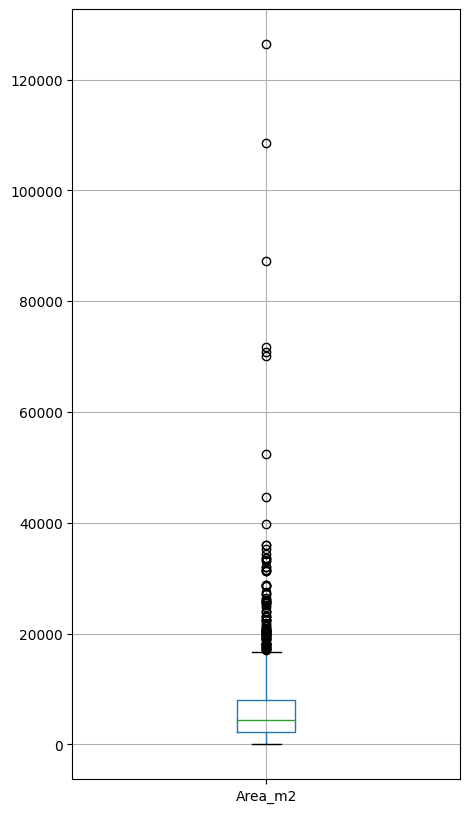

In [13]:
# Boxplot Area_m2 (condo price per sqm)

condo_df['Area_m2'] = condo_df['Area_m2'].str.replace(',', '')
condo_df['Area_m2'] = condo_df['Area_m2'].fillna(-1).astype('int64').replace(-1, np.nan)

plt.figure(figsize=(5,10))
_, bp = condo_df.boxplot('Area_m2', return_type='both')

In [14]:
# Q1 = condo_df['Area_m2'].quantile(0.25); # Q3 = condo_df['Area_m2'].quantile(0.75)
# IQR = Q3-Q1
# Outlier > Q3+1.5*IQR, Outlier < Q1-1.5*IQR

outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
boxes = [box.get_ydata() for box in bp["boxes"]][0]
medians = [median.get_ydata() for median in bp["medians"]][0]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]][0]

In [15]:
medians

array([4342., 4342.])

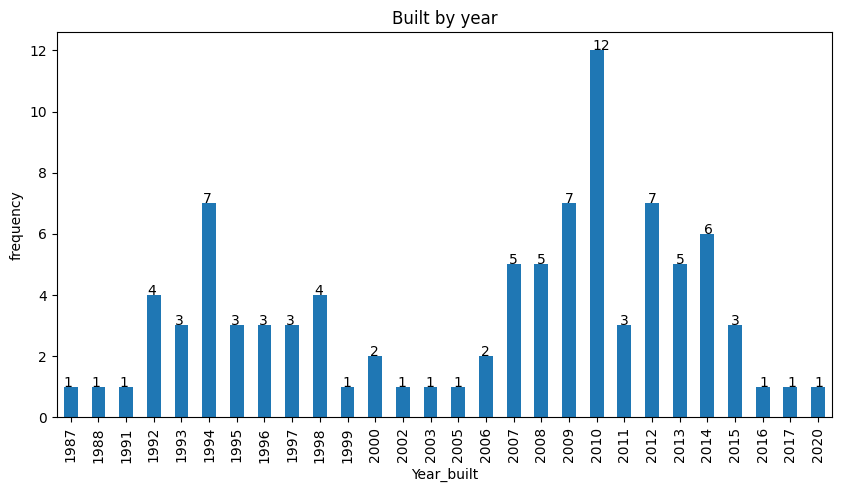

In [16]:
# In which year that the outlier-condo were built?

outlier_condo = condo_df[condo_df['Area_m2'] > min(outliers)]['Year_built'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.title('Built by year')
plt.xlabel('Year')
plt.ylabel('frequency')
ax = outlier_condo.plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.0025))

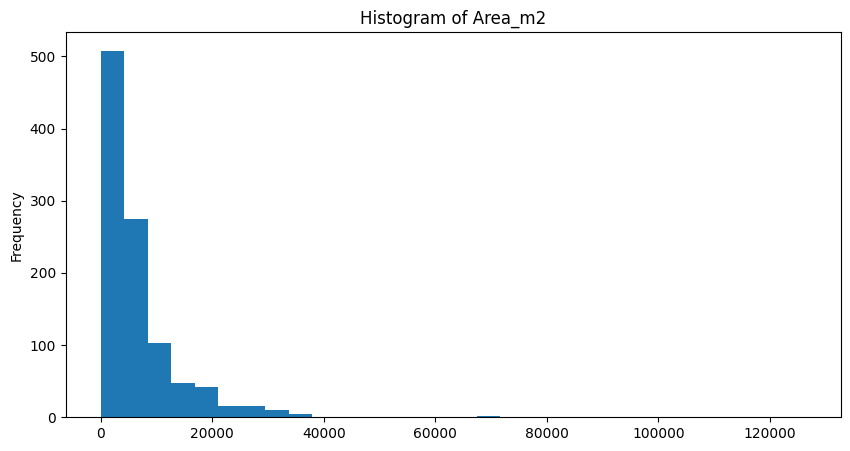

In [17]:
# Distribution of Area_m2

plt.figure(figsize=(10,5))
plt.title('Histogram of Area_m2')
plt.xlabel('Area_m2')
ax = condo_df['Area_m2'].plot.hist(bins=30)


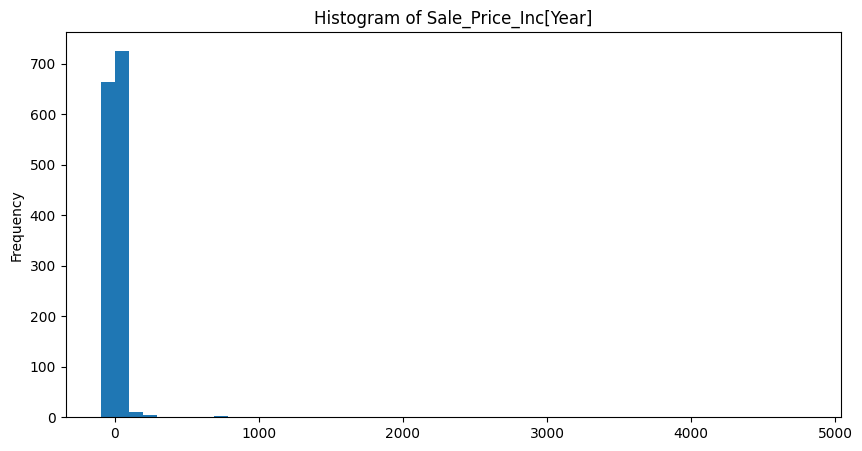

In [18]:
# Distribution of Sale_Price_Inc[Year]

plt.figure(figsize=(10,5))
plt.title('Histogram of Sale_Price_Inc[Year]')
plt.xlabel('Sale_Price_Inc[Year]')
ax = condo_df['Sale_Price_Inc[Year]'].plot.hist(bins=50)

In [19]:
# replace area_m2 and Sale_Price_Inc[Year] with median as the data are very skewed

condo_df['Area_m2'] = condo_df['Area_m2'].fillna(condo_df['Area_m2'].median())
condo_df['Sale_Price_Inc[Year]'] = condo_df['Sale_Price_Inc[Year]'].fillna(condo_df['Sale_Price_Inc[Year]'].median())

In [20]:
# drop Rental_Yield_Inc[Year] as it has many missing value

condo_df = condo_df.drop('Rental_Yield_Inc[Year]', axis=1)

In [21]:
# add kind of condo

condo_df['Kind'] = condo_df['#_Floor'].apply(lambda x: 'high rise' if x > 9 else 'low rise')

In [22]:
condo_df['Address_TH']

0                           ถนนเสรีไทย คลองจั่น บางกะปิ
1            1486 ถนน พระราม 9 แขวง หัวหมาก เขต บางกะปิ
2         84 ซอย รามคำแหง 43/1 แขวง หัวหมาก เขต บางกะปิ
3          79 ถนน สุขาภิบาล 2 แขวง คลองจั่น เขต บางกะปิ
4           99/224 ถนน หัวหมาก แขวง หัวหมาก เขต บางกะปิ
                             ...                       
1424    900/1-36 พระรามที่ 3 แขวง บางโพงพาง เขต ยานนาวา
1425       ซอย สามย่านซีฟู้ด แขวง ช่องนนทรี เขต ยานนาวา
1426         149 ซอย นนทรี 3 แขวง ช่องนนทรี เขต ยานนาวา
1427         651 ถนน เพชรบุรี แขวง ถนนพญาไท เขต ราชเทวี
1428                      ซอย แขวง ถนนพญาไท เขต ราชเทวี
Name: Address_TH, Length: 1429, dtype: object

In [23]:
a = condo_df['Address_TH'].apply(lambda x: re.findall(r'(ถนน\s?[ก-๙]+\s?\d?)', x))

In [24]:
a

0                    [ถนนเสรีไทย ]
1                   [ถนน พระราม 9]
2                               []
3                [ถนน สุขาภิบาล 2]
4                   [ถนน หัวหมาก ]
                   ...            
1424                            []
1425                            []
1426                            []
1427    [ถนน เพชรบุรี , ถนนพญาไท ]
1428                   [ถนนพญาไท ]
Name: Address_TH, Length: 1429, dtype: object

In [25]:
# add road

import re

condo_df['Road'] = condo_df['Address_TH'].apply(lambda x: re.findall(r'(ถนน\s?[ก-๙]+\s?\d?)', x))
condo_df['Road'] = condo_df['Road'].apply(lambda x: x[0] if len(x)> 0 else np.nan)
condo_df['Road'] = condo_df['Road'].str.replace(" ", "").str.strip()
condo_df['Road'] = condo_df['Road'].fillna(np.nan)
condo_df = condo_df.drop('Address_TH', axis=1)

In [26]:
condo_df['Road'].value_counts().sum()

453

<Axes: >

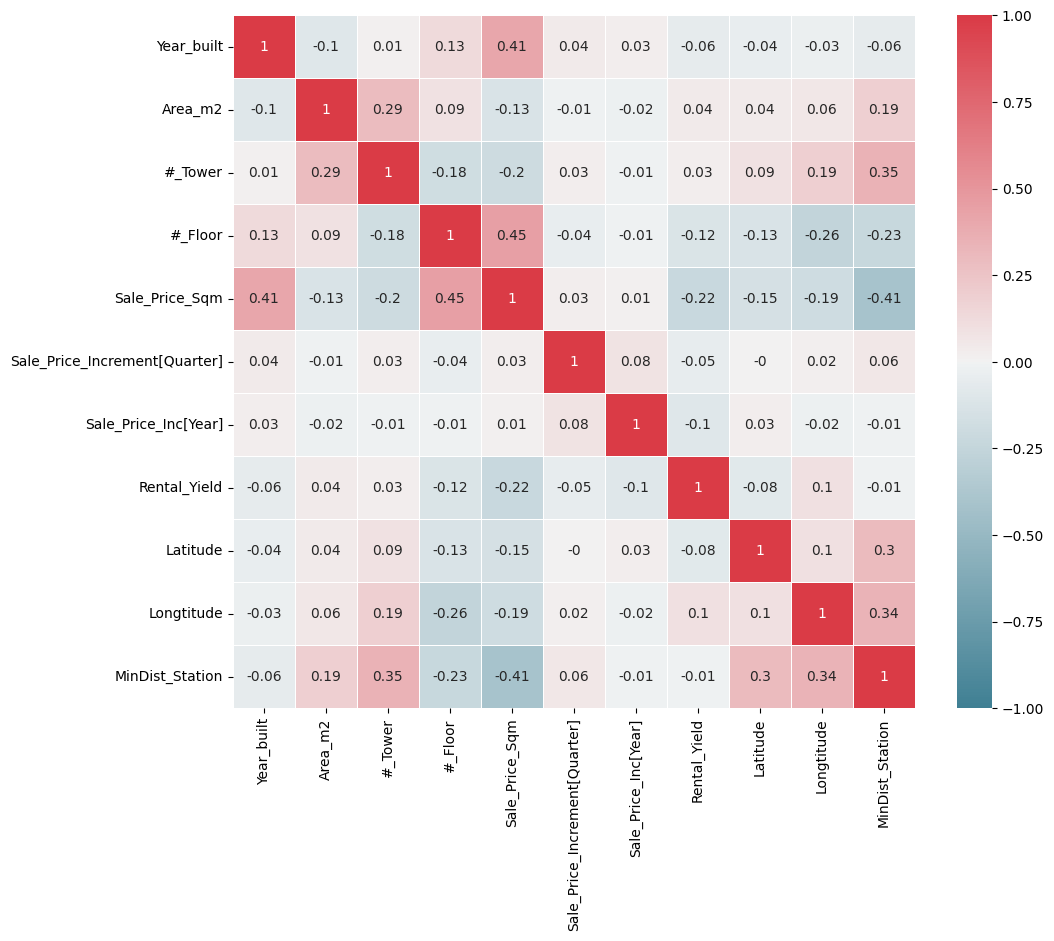

In [27]:
# Visualize the correlation between features

correlation = round(condo_df.corr(numeric_only=True), 2)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(11, 9))
sns.heatmap(correlation, cmap=cmap, linewidths=.5, annot=True, vmin=-1)

In [28]:
condo_df = condo_df.drop('Sale_Price_Inc[Year]', axis=1)
condo_df = condo_df.drop('Sale_Price_Increment[Quarter]', axis=1)

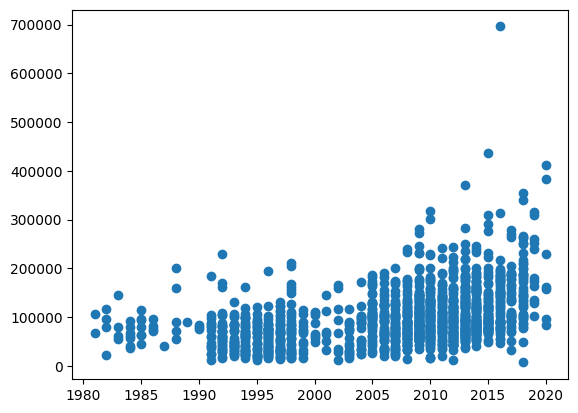

In [29]:
from matplotlib import pyplot as plt
plt.scatter(condo_df['Year_built'], condo_df['Sale_Price_Sqm'])

In [30]:
condo_df['Road']

0          ถนนเสรีไทย
1          ถนนพระราม9
2                 NaN
3       ถนนสุขาภิบาล2
4          ถนนหัวหมาก
            ...      
1424              NaN
1425              NaN
1426              NaN
1427      ถนนเพชรบุรี
1428         ถนนพญาไท
Name: Road, Length: 1429, dtype: object

In [31]:
# Feature engineering using one hot encoding

new_area = pd.get_dummies(condo_df['Condo_area'], dummy_na=True, prefix='Area_')
new_kind = pd.get_dummies(condo_df['Kind'], dummy_na=True, prefix='Kind_')
new_road = pd.get_dummies(condo_df['Road'], dummy_na=True, prefix='Road_')
condo_df = pd.concat([condo_df, new_area, new_kind, new_road], axis = 1)

condo_df = condo_df.drop('Condo_area', axis=1)
condo_df = condo_df.drop('Kind', axis=1)
condo_df = condo_df.drop('Road', axis=1)
condo_df.head()

,Year_built,Area_m2,#_Tower,#_Floor,Sale_Price_Sqm,Rental_Yield,Latitude,Longtitude,MinDist_Station,Area__Bang Kapi,...,Road__ถนนเลียบคลองภาษีเจริญฝั่งใต้,Road__ถนนเลียบคลองเคล็ด,Road__ถนนเสนานิคม1,Road__ถนนเสรีไทย,Road__ถนนเอกมัย,Road__ถนนแจ้งวัฒนะ,Road__ถนนแบริ่ง,Road__ถนนโชคชัย4,Road__ถนนโยธา,Road__nan
0,2011,6476.0,2,8.0,52065,4.86,13.766348,100.649395,8256,True,...,False,False,False,True,False,False,False,False,False,False
1,2014,4342.0,1,36.0,116682,0.00,13.746599,100.606029,3757,True,...,False,False,False,False,False,False,False,False,False,False
2,2006,4880.0,2,18.0,51000,5.81,13.758903,100.616998,5134,True,...,False,False,False,False,False,False,False,False,False,True
3,2001,4342.0,3,22.0,33600,6.75,13.767801,100.650655,8365,True,...,False,False,False,False,False,False,False,False,False,False
4,2013,5300.0,2,8.0,57080,6.37,13.751935,100.636527,6370,True,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# create function clean_data(df) to do all cleaning
def clean_data(df):
  
  

  #drop unused columns
  cols = ['ID', 'Condo_NAME_EN', 'Condo_NAME_TH', 'Condo_link', 'All_Data', 'Condo_Area_corr']
  clean_df = df.drop(cols, axis=1)

  #replace '' with np.nan
  clean_df = clean_df.applymap(lambda x: np.nan if x == '' else x)

  #fill no.of Floor by hand
  clean_df.loc[1427, '#_Floor'] = 27
  clean_df.loc[1428, '#_Floor'] = 5

  #clean Area_m2 columns
  clean_df['Area_m2'] = clean_df['Area_m2'].str.replace(',', '')
  clean_df['Area_m2'] = clean_df['Area_m2'].fillna(-1).astype('int64').replace(-1, np.nan)

  #replace missing data with median as the data are very skewed
  clean_df['Area_m2'] = clean_df['Area_m2'].fillna(clean_df['Area_m2'].median())
  clean_df['Sale_Price_Inc[Year]'] = clean_df['Sale_Price_Inc[Year]'].fillna(clean_df['Sale_Price_Inc[Year]'].median())

  #drop Rental_Yield_Inc[Year] as it has many missing value
  clean_df = clean_df.drop('Rental_Yield_Inc[Year]', axis=1)

  #add kind of condo [>9 floor: high rise, else: low rise]
  clean_df['Kind'] = clean_df['#_Floor'].apply(lambda x: 'high rise' if x > 9 else 'low rise')

  #add road feature
  clean_df['Road'] = clean_df['Address_TH'].apply(lambda x: re.findall(r'(ถนน\s?[\u0E00-\u0E7F]+\s?\d?)', x))
  clean_df['Road'] = clean_df['Road'].apply(lambda x: x[0] if len(x)> 0 else np.nan)
  clean_df['Road'] = clean_df['Road'].str.replace(" ", "").str.strip()
  clean_df['Road'] = clean_df['Road'].fillna(np.nan)
  clean_df = clean_df.drop('Address_TH', axis=1)

  #drop Sale_Price_Inc[Year], Sale_Price_Increment[Quarter]
  clean_df = clean_df.drop('Sale_Price_Inc[Year]', axis=1)
  clean_df = clean_df.drop('Sale_Price_Increment[Quarter]', axis=1)

  #get_dummies
  new_area = pd.get_dummies(clean_df['Condo_area'], dummy_na=True, prefix='Area_')
  new_kind = pd.get_dummies(clean_df['Kind'], dummy_na=True, prefix='Kind_')
  new_road = pd.get_dummies(clean_df['Road'], dummy_na=True, prefix='Road_')
  clean_df = pd.concat([clean_df, new_area, new_kind, new_road], axis = 1)

  clean_df = clean_df.drop('Condo_area', axis=1)
  clean_df = clean_df.drop('Kind', axis=1)
  clean_df = clean_df.drop('Road', axis=1)

  return clean_df

In [33]:
#run clean_data function
condo_df = load_data()
clean_df = clean_data(condo_df)
clean_df.head()

,Year_built,Area_m2,#_Tower,#_Floor,Sale_Price_Sqm,Rental_Yield,Latitude,Longtitude,MinDist_Station,Area__Bang Kapi,...,Road__ถนนเลียบคลองภาษีเจริญฝั่งใต้,Road__ถนนเลียบคลองเคล็ด,Road__ถนนเสนานิคม1,Road__ถนนเสรีไทย,Road__ถนนเอกมัย,Road__ถนนแจ้งวัฒนะ,Road__ถนนแบริ่ง,Road__ถนนโชคชัย4,Road__ถนนโยธา,Road__nan
0,2011,6476.0,2,8.0,52065,4.86,13.766348,100.649395,8256,True,...,False,False,False,True,False,False,False,False,False,False
1,2014,4342.0,1,36.0,116682,0.00,13.746599,100.606029,3757,True,...,False,False,False,False,False,False,False,False,False,False
2,2006,4880.0,2,18.0,51000,5.81,13.758903,100.616998,5134,True,...,False,False,False,False,False,False,False,False,False,True
3,2001,4342.0,3,22.0,33600,6.75,13.767801,100.650655,8365,True,...,False,False,False,False,False,False,False,False,False,False
4,2013,5300.0,2,8.0,57080,6.37,13.751935,100.636527,6370,True,...,False,False,False,False,False,False,False,False,False,False


In [34]:
y = condo_df['Sale_Price_Sqm'].values

In [35]:
y

array([ 52065, 116682,  51000, ...,  70897,  78880,  61437], dtype=int64)

In [36]:
# create function to split, extract feature and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def create_dataset(df, random_state=42):
  y = df['Sale_Price_Sqm'].values
  X = df.drop('Sale_Price_Sqm', axis=1).copy()
  
  # y = MinMaxScaler().fit_transform(y.values.reshape(-1,1)).ravel()
  # y = MinMaxScaler().inverse_transform(y) to convert value back

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

  # Minmax Scaler
  scaler = MinMaxScaler()

  # Fit scaler on training data and transform on other dataset to prevent information leakage
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)
  X_test = scaler.transform(X_test)

  return X_train, y_train, X_val, y_val, X_test, y_test, scaler

In [37]:
X_train, y_train, X_val, y_val, X_test, y_test, scaler = create_dataset(clean_df)
print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 1143
Validation size: 143
Test size: 143


In [38]:
# scaler ไว้สำหรับใช้ใน heroku
joblib.dump(scaler, "data_scaler.joblib")

['data_scaler.joblib']

In [39]:
# create function to split, extract feature and scale 
# using StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

def create_dataset_standard(df, random_state=42):
  y = df['Sale_Price_Sqm'].values
  X = df.drop('Sale_Price_Sqm', axis=1).copy()
  
  # y = MinMaxScaler().fit_transform(y.values.reshape(-1,1)).ravel()
  # y = MinMaxScaler().inverse_transform(y) to convert value back

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

  # Minmax Scaler
  scaler = StandardScaler()

  # Fit scaler on training data and transform on other dataset to prevent information leakage
  # Scale only numerical data 
  num_cols = ['Year_built',	'Area_m2',	'#_Tower',	'#_Floor',	'Rental_Yield',	'Latitude',	'Longtitude',	'MinDist_Station']
  X_train = scaler.fit_transform(X_train[num_cols])
  X_val = scaler.transform(X_val[num_cols])
  X_test = scaler.transform(X_test[num_cols])

  return X_train, y_train, X_val, y_val, X_test, y_test

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
# from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.losses import mean_squared_error
from sklearn.model_selection import train_test_split
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import kerastuner as kt
from keras import backend as K

C:\Users\brema\AppData\Local\Temp\ipykernel_25644\1587211913.py:18: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [41]:
# create function for RMSE loss evaluation
from sklearn.metrics import mean_squared_error as mse

def root_mean_squared_error(y_true, y_pred): # for keras
  result = K.sqrt(mean_squared_error(y_true, y_pred))
  return result

def rmse(y_true, y_pred): # for sklearn
  result = mse(y_true, y_pred, squared=False)
  return result

In [42]:
# Add NN model

model = Sequential()
model.add(Dense(60, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.25)) keep this for later optimization
model.add(Dense(30, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.build(X_train.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrap  (1143, 60)                10920     
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (1143, 30)                1830      
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (1143, 12)                372       
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (1143, 8)                 104       
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (1143, 1)                 9

In [43]:
# Complile model

model.compile(loss=root_mean_squared_error, optimizer='adam', metrics='mse')

In [44]:
# Fit model
tf.config.run_functions_eagerly(True)

history = model.fit(X_train, y_train, epochs=100, batch_size=16,  verbose=1, validation_data=(X_val, y_val))

Epoch 1/100


C:\Users\brema\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\data\ops\structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


72/72 [==============================] - 3s 37ms/step - loss: 100886.9531 - mse: 13547911168.0000 - val_loss: 94237.6562 - val_mse: 11432418304.0000
Epoch 2/100
72/72 [==============================] - 2s 32ms/step - loss: 100823.7656 - mse: 13535091712.0000 - val_loss: 94058.8906 - val_mse: 11398326272.0000
Epoch 3/100
72/72 [==============================] - 2s 34ms/step - loss: 100267.8281 - mse: 13422176256.0000 - val_loss: 92883.6250 - val_mse: 11175889920.0000
Epoch 4/100
72/72 [==============================] - 2s 33ms/step - loss: 97730.3125 - mse: 12923207680.0000 - val_loss: 88438.8906 - val_mse: 10360167424.0000
Epoch 5/100
72/72 [==============================] - 2s 33ms/step - loss: 89885.4062 - mse: 11456924672.0000 - val_loss: 76290.7500 - val_mse: 8327002112.0000
Epoch 6/100
72/72 [==============================] - 2s 33ms/step - loss: 72192.4062 - mse: 8436116992.0000 - val_loss: 54940.6484 - val_mse: 5047807488.0000
Epoch 7/100
72/72 [==============================] -

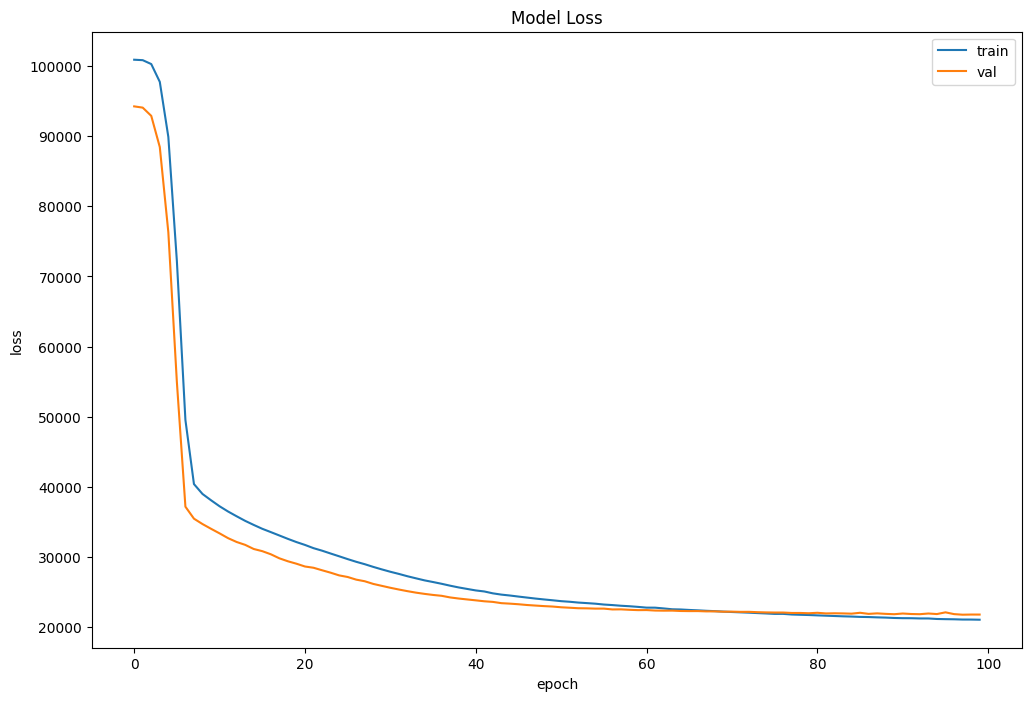

In [45]:
# RMSE Loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [46]:
# Tune Model

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=16,
                                     max_value=64,
                                     step=16),
                        activation='relu'))
       
        # drop_rate = hp.Choice('drop_rate_' + str(i), [0.0, 0.1, 0.2,0.3])
        # model.add(Dropout(rate=drop_rate))
    #model.add(Dense(1, activation='linear'))
    model.add(Dense(1))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss=root_mean_squared_error,
        metrics=['mse'])
    return model

In [47]:
# tune NN

def nn_tunner(build_model):
  # Instantiate model tuner
  tuner = kt.RandomSearch(
      build_model,
      objective='mse',
      max_trials=10,
      seed = 42,
      directory = 'tuner')

  # Search summary
  print('\n############')
  print('\nTuning Summary')
  print(tuner.search_space_summary())

  # Initialize search space
  print('\n############')
  print('\nTuning Model')
  tuner.search(X_train, y_train,
              epochs=100,
              validation_data=(X_val, y_val))
  
  return tuner

In [48]:
tuner = nn_tunner(build_model)

INFO:tensorflow:Reloading Tuner from tuner\untitled_project\tuner0.json

############

Tuning Summary
Search space summary
Default search space size: 7
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
None

############

Tuning Mode

In [49]:
tuner.results_summary()

Results summary
Results in tuner\untitled_project
Showing 10 best trials
Objective(name="mse", direction="min")

Trial 002 summary
Hyperparameters:
num_layers: 5
units_0: 48
units_1: 64
learning_rate: 0.01
units_2: 64
units_3: 16
units_4: 48
Score: 827454400.0

Trial 071 summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 48
learning_rate: 0.01
units_2: 32
units_3: 48
units_4: 16
Score: 833642560.0

Trial 085 summary
Hyperparameters:
num_layers: 5
units_0: 48
units_1: 32
learning_rate: 0.01
units_2: 16
units_3: 16
units_4: 48
Score: 838907776.0

Trial 051 summary
Hyperparameters:
num_layers: 5
units_0: 16
units_1: 16
learning_rate: 0.01
units_2: 64
units_3: 32
units_4: 64
Score: 840154368.0

Trial 064 summary
Hyperparameters:
num_layers: 5
units_0: 48
units_1: 48
learning_rate: 0.01
units_2: 32
units_3: 16
units_4: 64
Score: 854211136.0

Trial 072 summary
Hyperparameters:
num_layers: 4
units_0: 16
units_1: 64
learning_rate: 0.01
units_2: 64
units_3: 48
units_4: 48
Score: 868879

In [50]:
best_model = tuner.get_best_models(num_models=1)[0]

In [51]:
# Tuned hyperparameters
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5,
 'units_0': 48,
 'units_1': 64,
 'learning_rate': 0.01,
 'units_2': 64,
 'units_3': 16,
 'units_4': 48}

In [52]:
best_model.build(X_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrap  (1143, 48)                8736      
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (1143, 64)                3136      
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (1143, 64)                4160      
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (1143, 16)                1040      
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (1143, 48)                8

In [53]:
X_val

array([[0.71794872, 0.0129118 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.03432071, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.46153846, 0.03432071, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.71794872, 0.01246875, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.82051282, 0.08566727, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84615385, 0.03432071, 0.11538462, ..., 0.        , 0.        ,
        0.        ]])

In [54]:
# RMSE of tuned model
y_hat = best_model.predict(X_val)
rmse(y_val, y_hat)

5/5 [==============================] - 0s 6ms/step


26598.85400699942

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(random_state=2020)

# Generate tuning parameters
n_estimators = np.arange(200,1000,200)
max_depth = np.arange(2,int(X_train.shape[1]/10) ,3)
min_samples_split = np.arange(2,5,1)
min_samples_leaf = np.arange(2,5,1)

rf_params = dict(n_estimators = n_estimators,  
               min_samples_split = min_samples_split, 
               max_depth = max_depth,
               min_samples_leaf = min_samples_leaf)

# Instantiate grid search with RMSE as scoring
rf_grid = GridSearchCV(rf, param_grid=rf_params, cv = 3, verbose = 1, n_jobs = -1, scoring='neg_root_mean_squared_error')

In [70]:
rf_tuned = rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [71]:
rf_tuned.best_params_

{'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}

In [72]:
# average RMSE in cross validation
-np.nanmean(rf_grid.cv_results_['mean_test_score'])

35457.579620137956

In [73]:
# Calculate RMSE from validation set
yhat_val = rf_tuned.best_estimator_.predict(X_val)
rmse(y_val, yhat_val)

23227.82902847417

In [74]:
# export model
cls = rf_tuned.best_estimator_
joblib.dump(cls, 'rf.joblib')

['rf.joblib']

In [75]:
nn_best_model = joblib.load('rf.joblib')
predictions = nn_best_model.predict(X_val)
predictions

array([ 84280.95296417, 119581.95056782,  77097.79326086, 139254.85002627,
        60502.11235955,  64019.44629666,  71836.41189768, 101915.45480028,
       109319.87488145,  64098.30136134, 126534.56824634, 129226.77055687,
       107523.38305918,  83878.16087014, 195670.29513933,  66528.14478049,
       104259.42891363, 136474.38718406, 104502.194653  ,  92052.69846093,
        22057.96029781, 103626.35551752,  98434.71965682, 160494.93086634,
       108367.21486261, 113331.1464673 , 119128.87065206,  71816.23721878,
        36367.16527412,  79728.77887288, 184414.88422374, 101587.69778445,
        80618.9942991 , 114155.82977765,  48835.62594766, 115476.47324879,
       165517.47276933, 117867.86223135,  86339.60933176,  78994.73213486,
        55252.51202799,  75633.54513806,  92209.75547974,  90150.55208632,
        46830.19611602,  50259.1949278 ,  73488.42190361, 133034.99014159,
       100158.93107905, 105368.8287349 , 146798.89248159, 116769.51534373,
        63067.05710903,  